In [292]:
# Modules import

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [293]:
!pip install s3fs

In [294]:
# Import des datatsets

df1 = pd.read_csv("s3://full-stack-bigdata-datasets/Machine Learning Supervisé/projects/fraudulent_activity/Fraud_Data.csv")
ip_country = pd.read_csv("s3://full-stack-bigdata-datasets/Machine Learning Supervisé/projects/fraudulent_activity/IpAddress_to_Country.csv")

## Exploration des datasets

In [295]:
df1.to_csv('fraud.csv', index = False)

In [296]:
df1 = pd.read_csv("fraud.csv")
df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


Class = 1 means the transaction have been categorized as fraudulous< This is our target value.

In [297]:
df1["class"].value_counts()

0    136961
1     14151
Name: class, dtype: int64

In [298]:
df1["class"] = df1.apply(lambda x : "normal" if x["class"] == 0 else "fraudulous", axis =1)
df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,normal
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,normal
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,fraudulous
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,normal
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,normal


In [299]:
df1['source'].value_counts()

SEO       60615
Ads       59881
Direct    30616
Name: source, dtype: int64

Here SEO comes from Search Engine Optimization (meaning that the user have been redirected to the seller website via a search engine)

In [300]:
ip_country.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


The preceeding tab give us the range of IP address for each country

In [301]:
# number of transactions recorded
df1.shape

(151112, 11)

In [302]:
# identified IP address
ip_country.shape

(138846, 3)

In [303]:
df1.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class              object
dtype: object

In [304]:
ip_country.dtypes

lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

In [305]:
# Recast some columns to "datetime" format

df1["signup_time"] = pd.to_datetime(df1["signup_time"], format = "%Y-%m-%d %H:%M:%S")
df1["purchase_time"] = pd.to_datetime(df1["purchase_time"], format = "%Y-%m-%d %H:%M:%S")

In [306]:
df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,normal
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,normal
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,fraudulous
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,normal
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,normal


In [307]:
# check NaN

display(100*df1.isnull().sum()/df1.shape[0])

user_id           0.0
signup_time       0.0
purchase_time     0.0
purchase_value    0.0
device_id         0.0
source            0.0
browser           0.0
sex               0.0
age               0.0
ip_address        0.0
class             0.0
dtype: float64

In [308]:
display(100*ip_country.isnull().sum()/ip_country.shape[0])

lower_bound_ip_address    0.0
upper_bound_ip_address    0.0
country                   0.0
dtype: float64

In [309]:
df1["class"].value_counts()
print("Number of fraudulent transactions : {}".format(df1["class"].value_counts()[1]))
a = round(df1['class'].value_counts()[1]/df1['class'].count()*100, 2)
print("Percentage of fraudulent transactions : {}%".format(a))

Number of fraudulent transactions : 14151
Percentage of fraudulent transactions : 9.36%


###  Determine country of origin per IP address

In [310]:
def transform_ip(arg):
    try:
        return ip_country.country[(ip_country.lower_bound_ip_address < arg) & (ip_country.upper_bound_ip_address > arg)].iloc[0]  
    except IndexError:
        return "Unknown country"

In [311]:
%time df1["country_name"] = df1.ip_address.apply(transform_ip)

CPU times: user 3min 49s, sys: 24 s, total: 4min 13s
Wall time: 3min 47s


In [312]:
df1 = df1.iloc[:, 1:] 
df1["time_delta"] = (df1.purchase_time - df1.signup_time) / np.timedelta64(1, 's')
df1.head()

,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name,time_delta
0,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,normal,Japan,4506682.0
1,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,normal,United States,17944.0
2,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,fraudulous,United States,1.0
3,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,normal,Unknown country,492085.0
4,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,normal,United States,4361461.0


In [313]:
df1 = df1.rename(columns={"class": "target"})

### Some dataviz

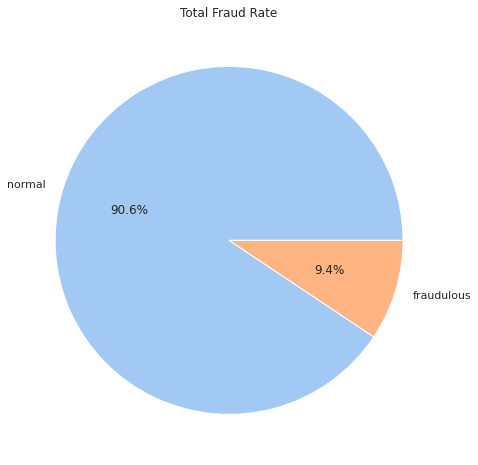

In [314]:
sns.set(style="ticks", palette="pastel")

### TOTAL FRAUD RATE ###
fig = plt.figure(figsize=(15,8))
not_fraud = df1[df1.target == "normal"].target.value_counts()
fraud = df1[df1.target == "fraudulous"].target.value_counts()

labels = ['normal','fraudulous']

fraud_pie = np.concatenate((not_fraud, fraud), axis=0)

plt.pie(fraud_pie, labels=labels, autopct='%1.1f%%')
plt.title("Total Fraud Rate")
plt.show()

<AxesSubplot:xlabel='source', ylabel='count'>

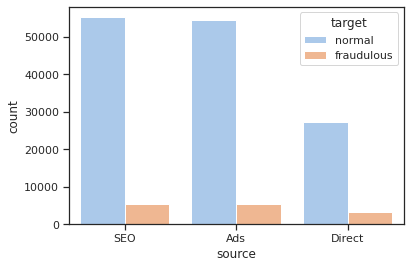

In [315]:
sns.countplot(x = 'source', data = df1, hue = 'target')

<AxesSubplot:xlabel='browser', ylabel='count'>

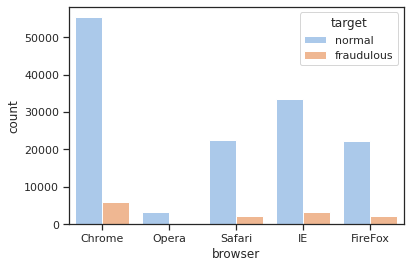

In [316]:
sns.countplot(x = 'browser', data = df1, hue = 'target')

<AxesSubplot:xlabel='sex', ylabel='count'>

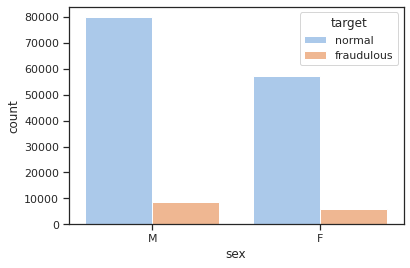

In [317]:
sns.countplot(x = 'sex', data = df1, hue = 'target')

In [318]:
df1.nunique()

signup_time       151112
purchase_time     150679
purchase_value       122
device_id         137956
source                 3
browser                5
sex                    2
age                   58
ip_address        143512
target                 2
country_name         182
time_delta        143513
dtype: int64

In [319]:
df1['country_name'].value_counts()

United States      58049
Unknown country    21966
China              12038
Japan               7306
United Kingdom      4490
                   ...  
Saint Martin           1
Madagascar             1
Gambia                 1
Yemen                  1
Tajikistan             1
Name: country_name, Length: 182, dtype: int64

In [320]:
# Drop lines with few fraud occurences per country_name (< 50 occurences)
country_counts = df1['country_name'].value_counts()
to_keep = country_counts[country_counts > 50].index.values
df1 = df1.loc[df1['country_name'].isin(to_keep), :]

In [324]:
df1['year_purchase'] = pd.DatetimeIndex(df1['purchase_time']).year
df1['month_purchase'] = pd.DatetimeIndex(df1['purchase_time']).month
df1['day_purchase'] = pd.DatetimeIndex(df1['purchase_time']).day
df1['hour_purchase'] = pd.DatetimeIndex(df1['purchase_time']).hour
df1['min_purchase'] = pd.DatetimeIndex(df1['purchase_time']).minute
df1['second_purchase'] = pd.DatetimeIndex(df1['purchase_time']).second

# Drop columns with too many unique values
df1 = df1.drop(['signup_time', 'purchase_time', 'device_id'], axis=1)

# Drop ip address (not useful as raw number, we will rather use the country_name deduced from the ip)
df1 = df1.drop(['ip_address'], axis=1)
df1.head()

,purchase_value,source,browser,sex,age,target,country_name,time_delta,year_purchase,month_purchase,day_purchase,hour_purchase,min_purchase,second_purchase
0,34,SEO,Chrome,M,39,normal,Japan,4506682.0,2015,4,18,2,47,11
1,16,Ads,Chrome,F,53,normal,United States,17944.0,2015,6,8,1,38,54
2,15,SEO,Opera,M,53,fraudulous,United States,1.0,2015,1,1,18,52,45
3,44,SEO,Safari,M,41,normal,Unknown country,492085.0,2015,5,4,13,54,50
4,39,Ads,Safari,M,45,normal,United States,4361461.0,2015,9,9,18,40,53


<AxesSubplot:xlabel='month_purchase', ylabel='count'>

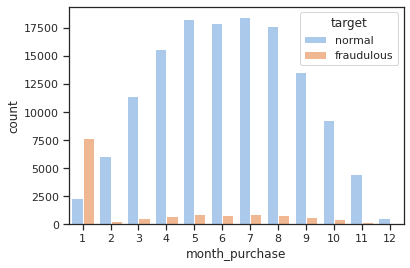

In [325]:
sns.countplot(x = 'month_purchase', data = df1, hue = 'target')

According to this plot, and assuming that fraud doesn't depend of the month (which seems to be evident...) we could focus our training on the January month, then test our model 
on the other months. This would be a good idea if our dataset where small, but here we have more than 100.000 samples, so we could use the entire set.

In [326]:
# to reduce runtime, eliminate 2015 year (always the same)
#df1 = df1.drop(['month_purchase'] , axis = 1)
df1 = df1.drop(['year_purchase'] , axis = 1)

In [ ]:
#df1 = df1.sample(10000)

### Preprocessing this classification problem

In [327]:
# Separate target variable y from features X
target_name = 'target'

print("Separating labels from features...")
y = df1.loc[:,target_name]
X = df1.loc[:,[c for c in df1.columns if c!=target_name]] 
print("...Done.")
print(y.head())
print()
print(X.head())

Separating labels from features...
...Done.
0        normal
1        normal
2    fraudulous
3        normal
4        normal
Name: target, dtype: object

   purchase_value source browser sex  age     country_name  time_delta  \
0              34    SEO  Chrome   M   39            Japan   4506682.0   
1              16    Ads  Chrome   F   53    United States     17944.0   
2              15    SEO   Opera   M   53    United States         1.0   
3              44    SEO  Safari   M   41  Unknown country    492085.0   
4              39    Ads  Safari   M   45    United States   4361461.0   

   month_purchase  day_purchase  hour_purchase  min_purchase  second_purchase  
0               4            18              2            47               11  
1               6             8              1            38               54  
2               1             1             18            52               45  
3               5             4             13            54               50  
4 

In [328]:
type(X)

pandas.core.frame.DataFrame

In [329]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X = X.values
y = y.tolist()
print("...Done")
print(X[0:5,:])
print()
print(y[0:5])

Convert pandas DataFrames to numpy arrays...
...Done
[[34 'SEO' 'Chrome' 'M' 39 'Japan' 4506682.0 4 18 2 47 11]
 [16 'Ads' 'Chrome' 'F' 53 'United States' 17944.0 6 8 1 38 54]
 [15 'SEO' 'Opera' 'M' 53 'United States' 1.0 1 1 18 52 45]
 [44 'SEO' 'Safari' 'M' 41 'Unknown country' 492085.0 5 4 13 54 50]
 [39 'Ads' 'Safari' 'M' 45 'United States' 4361461.0 9 9 18 40 53]]

['normal', 'normal', 'fraudulous', 'normal', 'normal']


In [330]:
# Divide dataset into train set & test set 
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) # stratified splitting because we have an imbalanced dataset !!

print("number of test samples :", X_test.shape[0])
print("number of training samples:", X_train.shape[0])

Dividing into train and test sets...
number of test samples : 29987
number of training samples: 119946


In [331]:
# ENCODING FEATURES IN SUITABLE FORMAT

# Create pipeline for numeric features
numeric_features = [0,4,6,7,8,9,10,11] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = [1, 2, 3, 5] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# ColumnTransformer make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessing on train set
print("Performing preprocessings on train set...")
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])


# Preprocessing on test set
print("Performing preprocessings on test set...")
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
print('...Done.')
print(X_test[0:5,:])

Performing preprocessings on train set...
...Done.
  (0, 0)	-1.2509616297836226
  (0, 1)	-1.2929590198922396
  (0, 2)	-0.8117221645682801
  (0, 3)	-0.004570239811738985
  (0, 4)	-0.487010249983952
  (0, 5)	0.6456595764762324
  (0, 6)	-0.25424286363603427
  (0, 7)	0.7195834297067405
  (0, 9)	1.0
  (0, 50)	1.0
  (1, 0)	0.9815277491279603
  (1, 1)	1.7247472183110197
  (1, 2)	1.1768233964240562
  (1, 3)	1.4983275928375726
  (1, 4)	-1.3942998164069005
  (1, 5)	1.5136873833628872
  (1, 6)	-0.02328829452242531
  (1, 7)	1.7007704376725665
  (1, 14)	1.0
  (1, 87)	1.0
  (2, 0)	-0.8698049065548157
  (2, 1)	1.7247472183110197
  (2, 2)	-1.5787909114209204
  (2, 3)	-1.8831925306233783
  (2, 4)	-1.507711012209769
  :	:
  (2, 10)	1.0
  (2, 14)	1.0
  (2, 88)	1.0
  (3, 0)	0.7092729468216696
  (3, 1)	-0.2483683989757268
  (3, 2)	0.1485835287131838
  (3, 3)	-0.004570239811738985
  (3, 4)	0.6471017080447334
  (3, 5)	-0.07769692926264662
  (3, 6)	0.2654049168695859
  (3, 7)	-1.0696399377603543
  (3, 9)	1.0


In [332]:
y_test[:10]

['normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal']

In [333]:
#Encoding target variable (not really necessary here as target variable is already in a binary format but useful for categorical or numerical target variable)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [334]:
# now encoded
y_test

array([1, 1, 1, ..., 1, 1, 1])

## First Model : Logistic Regression

In [335]:
# Evaluate model with Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("Accuracy for Logistic Regression model is : \n{}".format(accuracy))

Accuracy for Logistic Regression model is : 
0.9296028278920866


Our predictions are good. Just look at the distribution of test set with a cross-validation

In [336]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_test, y_test, cv=5)
scores

array([0.93414471, 0.9348116 , 0.93313323, 0.92813073, 0.93396698])

Results are nearly the same, so our dataset is well balanced (because results doesn't depend of the splitting, or very weakly)

(0.9, 0.96)

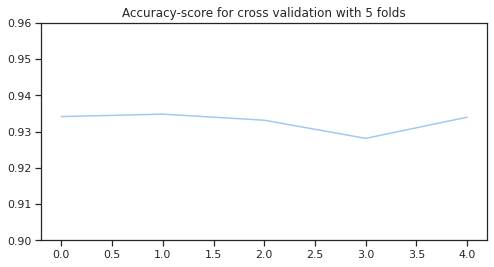

In [337]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(scores)
ax.set_title('Accuracy-score for cross validation with 5 folds');
ax.set_ylim(0.90, 0.96)

In [338]:
# diplay first few predictions
y_pred = model.predict(X_test)
#y_pred[0:5]
df_y_pred = pd.DataFrame(y_pred, columns = ['prediction'])
df_y_pred.head()

,prediction
0,1
1,1
2,1
3,1
4,1


In [339]:
df_y_pred.shape

(29987, 1)

In [340]:
print("f1-score on test set : ", f1_score(y_test, y_pred))

f1-score on test set :  0.9625835268260693


In [341]:
from sklearn.metrics import precision_score, recall_score
print('--- Test set ---')
print('Precision : ', precision_score(y_test, y_pred))
print('Recall : ', recall_score(y_test, y_pred))

--- Test set ---
Precision :  0.9284053610503282
Recall :  0.99937433292849


<AxesSubplot:>

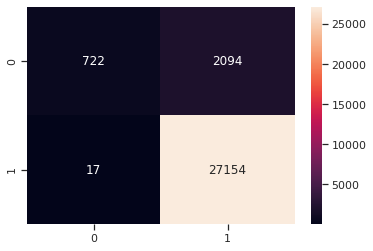

In [342]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
# True values on the vertical axis, predicted values on the horizontal one

### Interpreting the scores

* The precision represents the "purity" of the predictions "1". In other words, it's the ratio of examples being predicted as 1s that are indeed true 1s : $P = \frac{TP}{TP + FP}$ 
* The recall represents the ability to detect the true "1". It's the ratio of examples that are true 1s and have been predicted as 1s : $R = \frac{TP}{TP + FN}$ 
* From the formulae above, one can see the the precision is maximal when there are no false positives, and the recall is maximal when there are no false negatives

#### What does that mean in the context of fraud detection?

* False positives represent transactions that are reported as frauds but in fact aren't
* False negatives represent frauds that are not detected (this is the kind of error that we want to avoid)
* In this case, we would like to detect as much frauds as possible while having a number of false positives that is as close as possible to 0 (because we want to avoid fake alerts that would be time-consuming for the company)

#### What is our model doing here?
* Our model's precision is almost perfect (P=0.95) which means there are very few false positives
* Our model's recall is much smaller with 26% of frauds detected: not enough !


## Second model : Decision Tree

In [ ]:
### Preprocessing ###
# With a decision tree, there's no need to normalize the numerical variables!

# only Encode target label with LabelEncoder()


In [343]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [344]:
# diplay first few predictions
y_pred = model.predict(X_test)

In [345]:
print("f1-score on test set : ", f1_score(y_test, y_pred))

f1-score on test set :  0.9461420010760467


In [346]:
from sklearn.metrics import precision_score, recall_score
print('--- Test set ---')
print('Precision : ', precision_score(y_test, y_pred))
print('Recall : ', recall_score(y_test, y_pred))

--- Test set ---
Precision :  0.9539468761690983
Recall :  0.9384638033197159


<AxesSubplot:>

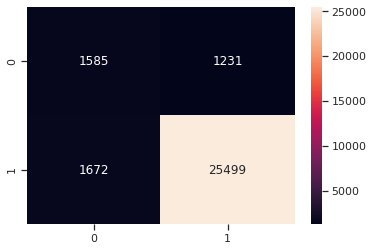

In [347]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
# True values on the vertical axis, predicted values on the horizontal one

In [348]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [356]:
class_names = encoder.inverse_transform([0, 1]) # for class R,L, B
class_names

array(['fraudulous', 'normal'], dtype='<U10')

In [354]:
df1 = df1.drop(['target'] , axis = 1)
df1.columns

Index(['purchase_value', 'source', 'browser', 'sex', 'age', 'country_name',
       'time_delta', 'month_purchase', 'day_purchase', 'hour_purchase',
       'min_purchase', 'second_purchase'],
      dtype='object')

In [357]:
df1.columns

Index(['purchase_value', 'source', 'browser', 'sex', 'age', 'country_name',
       'time_delta', 'month_purchase', 'day_purchase', 'hour_purchase',
       'min_purchase', 'second_purchase'],
      dtype='object')

In [358]:
#from sklearn.tree import plot_tree

#plt.figure(figsize=(20,20))
#a = plot_tree(model, 
#             feature_names=df1.columns, 
#             class_names=class_names, 
#             filled=True, 
#             rounded=True, 
#             fontsize=14)

# Second bis model : Random Forest

We had some complexity in order to get more accurate results. The runtime is of course longer

In [359]:
# Train Random Forest with grid search
rf = RandomForestClassifier()

params = {
    'n_estimators': [100, 120, 140, 160, 180],
    'max_depth': [4, 6, 8]
}

model = GridSearchCV(rf, param_grid = params, verbose=2)

print("Training model...")
model.fit(X_train, y_train)
print("...Done.")

print("Best hyperparameters : ")
print(model.best_params_)


# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

# Print scores
print("f1-score on test set : ", f1_score(y_test, y_pred))

Training model...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] max_depth=4, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=4, n_estimators=100, total=   3.2s
[CV] max_depth=4, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] .................... max_depth=4, n_estimators=100, total=   3.4s
[CV] max_depth=4, n_estimators=100 ...................................
[CV] .................... max_depth=4, n_estimators=100, total=   3.3s
[CV] max_depth=4, n_estimators=100 ...................................
[CV] .................... max_depth=4, n_estimators=100, total=   3.3s
[CV] max_depth=4, n_estimators=100 ...................................
[CV] .................... max_depth=4, n_estimators=100, total=   3.2s
[CV] max_depth=4, n_estimators=120 ...................................
[CV] .................... max_depth=4, n_estimators=120, total=   4.1s
[CV] max_depth=4, n_estimators=120 ...................................
[CV] .................... max_depth=4, n_estimators=120, total=   4.0s
[CV] max_depth=4, n_estimators=120 ...................................
[CV] .................... max_depth=4, n_estimators=120, total=   4.0s
[CV] max_depth=4, n_estimators=120 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  8.8min finished


...Done.
Best hyperparameters : 
{'max_depth': 6, 'n_estimators': 100}
Predictions on test set...
...Done.
[1 1 1 1 1]

f1-score on test set :  0.9461420010760467


**The f1-score has been multiplied by a factor 2 by introducing non-linearities in the model! Combined with the grid_search, we converged to a model with quite good performances and no overfitting. Let's have a look to the confusion matrix and other classification scores:**

In [360]:
print('--- Test set ---')
print('Precision : ', precision_score(y_test, y_pred))
print('Recall : ', recall_score(y_test, y_pred))
print()

--- Test set ---
Precision :  0.9539468761690983
Recall :  0.9384638033197159



<AxesSubplot:>

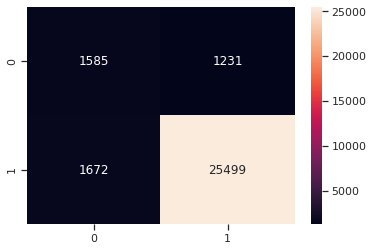

In [361]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "d")

In [362]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70      2816
           1       0.95      1.00      0.98     27171

    accuracy                           0.96     29987
   macro avg       0.98      0.77      0.84     29987
weighted avg       0.96      0.96      0.95     29987



## Third Model: Naives Bayes
    
As we may consider that all features are independant and equal, we may also try a Naives Bayes model.

In [363]:
#A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array
X_train=X_train.toarray()
X_test=X_test.toarray()

In [364]:
import sklearn.naive_bayes as nb
from sklearn.naive_bayes import GaussianNB

model = nb.GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [365]:
model.score(X_train, y_train)

0.7666533273306321

In [366]:
model.score(X_test, y_test)

0.7639310367826058

The gaussian model is inadequate, due to the non-gaussian distribution of data

In [367]:
from sklearn.naive_bayes import MultinomialNB

naivebayes = MultinomialNB()
naivebayes_fit = naivebayes.fit(abs(X_train), abs(y_train))
naivebayes_fit

MultinomialNB()

In [368]:
score_NB_train = naivebayes_fit.score(abs(X_train), abs(y_train))
score_NB_test = naivebayes_fit.score(abs(X_test), abs(y_test))

print("The score for the train set with Naive Bayes (Multinomial NB) is : \n{}".format(score_NB_train))
print("The score for the test set with Naive Bayes (Multinomial NB) is : \n{}".format(score_NB_test))

The score for the train set with Naive Bayes (Multinomial NB) is : 
0.9062661531022294
The score for the test set with Naive Bayes (Multinomial NB) is : 
0.9062260312802214


In [369]:
y_pred = naivebayes_fit.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [370]:
print("f1-score on test set : ", f1_score(y_test, y_pred))

f1-score on test set :  0.9506412611761412


In [371]:
print('--- Test set ---')
print('Precision : ', precision_score(y_test, y_pred))
print('Recall : ', recall_score(y_test, y_pred))
print()


--- Test set ---
Precision :  0.9060769795210459
Recall :  0.9998159802730853



<AxesSubplot:>

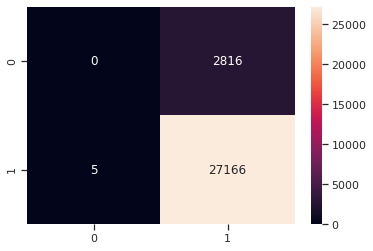

In [372]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "d")

### Second model : SVC

Because the running time for SVM models is linear, we use only a sample of 10.000 items to train our model.

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', class_weight='balanced') # instanciation of Object
%time svm.fit(X_train, y_train) # if data need to be flattered, use insteda np.array(X_train or y_train).ravel()

In [ ]:
%time svm.score(X_test, y_test)

In [ ]:
y_pred = svm.predict(X_test)
print("f1-score on test set : ", f1_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

#print('--- Train set ---')
#print('Precision : ', precision_score(y_train, y_train_pred))
#print('Recall : ', recall_score(y_train, y_train_pred))
#print()
#print(confusion_matrix(y_train, y_train_pred))
#print()
print('--- Test set ---')
print('Precision : ', precision_score(y_test, y_pred))
print('Recall : ', recall_score(y_test, y_pred))
print()

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
# True values on the vertical axis, predicted values on the horizontal one